In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
raw_data_ = pd.read_excel("feature_matrix_995.xlsx")

In [4]:
raw_data = raw_data_

In [5]:
raw_data.head(5)

,Unnamed: 0,GV_Key,index,Date_cal,Ticker Symbol,Company Name,Quarter,Fiscal Data Year and Quarter,Final Date,Date_rep,...,Leverage,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E,is_outlier
0,0,GV_001076,72,2017-03-31,PRG,PROG HOLDINGS INC,2017Q1,2017Q1,2017-05-16,2017-04-28,...,0.184690,0.428386,0.132784,0.035529,1.706586,2.541843,4.578281,24.888109,40.276245,0
1,1,GV_001076,73,2017-06-30,PRG,PROG HOLDINGS INC,2017Q2,2017Q2,2017-08-13,2017-07-28,...,0.157415,0.394822,0.102167,0.023562,2.178355,3.453030,6.415589,38.090930,77.513235,0
2,2,GV_001076,74,2017-09-30,PRG,PROG HOLDINGS INC,2017Q3,2017Q3,2017-10-30,2017-10-27,...,0.143619,0.393467,0.048652,0.016100,1.759674,2.768258,5.368843,50.491260,91.639814,0
3,3,GV_001076,75,2017-12-31,PRG,PROG HOLDINGS INC,2017Q4,2017Q4,2018-03-14,2018-02-15,...,0.100884,0.358160,0.018957,0.102754,1.793223,2.933589,5.565334,37.422952,14.615522,0
4,4,GV_001076,76,2018-03-31,PRG,PROG HOLDINGS INC,2018Q1,2018Q1,2018-05-16,2018-04-26,...,0.131856,0.354106,0.069661,0.029750,1.695942,2.610930,4.677097,35.167794,47.715412,0


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29411 entries, 0 to 29410
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    29411 non-null  int64         
 1   GV_Key                        29411 non-null  object        
 2   index                         29411 non-null  int64         
 3   Date_cal                      29411 non-null  datetime64[ns]
 4   Ticker Symbol                 29411 non-null  object        
 5   Company Name                  29411 non-null  object        
 6   Quarter                       29411 non-null  object        
 7   Fiscal Data Year and Quarter  29409 non-null  object        
 8   Final Date                    29409 non-null  datetime64[ns]
 9   Date_rep                      29411 non-null  datetime64[ns]
 10  Assets                        29411 non-null  float64       
 11  Cash                        

In [7]:
value_compo = pd.read_excel("Value Compo.xlsx")
growth_compo = pd.read_excel("Growth Compo.xlsx")

In [8]:
growth_compo.head(5)

,Company Name,Exchange:Ticker,Index Constituents [Primary Listing],Excel Company ID,GV_Key,Universe
0,"10x Genomics, Inc. (NasdaqGS:TXG)",NasdaqGS:TXG,S&P Global BMI Growth Index,IQ223288117,GV_035640,Growth
1,11 bit studios S.A. (WSE:11B),WSE:11B,S&P Global BMI Growth Index,IQ114978149,GV_297126,Growth
2,"1stdibs.Com, Inc. (NasdaqGM:DIBS)",NasdaqGM:DIBS,S&P Global BMI Growth Index,IQ129622619,GV_038824,Growth
3,2020 Bulkers Ltd. (OB:2020),OB:2020,S&P Global BMI Growth Index,IQ544117951,GV_332941,Growth
4,23andMe Holding Co. (NasdaqGS:ME),NasdaqGS:ME,S&P Global BMI Growth Index,IQ34511998,GV_038717,Growth


In [9]:
raw_data = raw_data.merge(value_compo[['GV_Key','Universe']], how = 'left', on='GV_Key')

In [10]:
raw_data.rename(columns = {'Universe': 'Universe_Value'}, inplace = True)

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29411 entries, 0 to 29410
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    29411 non-null  int64         
 1   GV_Key                        29411 non-null  object        
 2   index                         29411 non-null  int64         
 3   Date_cal                      29411 non-null  datetime64[ns]
 4   Ticker Symbol                 29411 non-null  object        
 5   Company Name                  29411 non-null  object        
 6   Quarter                       29411 non-null  object        
 7   Fiscal Data Year and Quarter  29409 non-null  object        
 8   Final Date                    29409 non-null  datetime64[ns]
 9   Date_rep                      29411 non-null  datetime64[ns]
 10  Assets                        29411 non-null  float64       
 11  Cash                        

In [12]:
raw_data = raw_data.merge(growth_compo[['GV_Key','Universe']], how = 'left', on='GV_Key')

In [13]:
raw_data.rename(columns = {'Universe': 'Universe_Growth'}, inplace = True)

In [14]:
raw_data.columns

Index(['Unnamed: 0', 'GV_Key', 'index', 'Date_cal', 'Ticker Symbol',
       'Company Name', 'Quarter', 'Fiscal Data Year and Quarter', 'Final Date',
       'Date_rep', 'Assets', 'Cash', 'Long-Term Debt', 'Invested Capital',
       'Liabilities', 'Net Income', 'EBIT', 'EBITDA', 'Revenue',
       'Stockholders Equity', 'HQ', 'Share_Price', 'Share_Price_BD',
       'Div_Per_Share_Ann', 'Div_Yield', 'Market_Cap', 'Beta_1Y', 'Beta_2Y',
       'Beta_5Y', 'Rev_1y_Growth', 'Rev_2y_Growth', 'Primary Industry',
       'Industry Sector', 'Industry Group', 'Industry', 'Shares_out',
       'EBIT_Margin', 'EBITDA_Margin', 'Profit_Margin', 'Leverage',
       'Debt/Assets', 'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA',
       'P/EBIT', 'P/E', 'is_outlier', 'Universe_Value', 'Universe_Growth'],
      dtype='object')

In [15]:
raw_data.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [16]:
raw_data.columns

Index(['GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name', 'Quarter',
       'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep', 'Assets',
       'Cash', 'Long-Term Debt', 'Invested Capital', 'Liabilities',
       'Net Income', 'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ',
       'Share_Price', 'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield',
       'Market_Cap', 'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth',
       'Rev_2y_Growth', 'Primary Industry', 'Industry Sector',
       'Industry Group', 'Industry', 'Shares_out', 'EBIT_Margin',
       'EBITDA_Margin', 'Profit_Margin', 'Leverage', 'Debt/Assets',
       'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA', 'P/EBIT', 'P/E',
       'is_outlier', 'Universe_Value', 'Universe_Growth'],
      dtype='object')

In [17]:
raw_data.Universe_Value.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
29406     True
29407     True
29408     True
29409    False
29410    False
Name: Universe_Value, Length: 29411, dtype: bool

In [18]:
'''raw_data["Universe"] = np.where((not(raw_data.Universe_Value.isna) and not(raw_data.Universe_Growth.isna)), 'ambigous',
                                np.where(not(raw_data.Universe_Value.isna),raw_data.Universe_Value, 
                                         np.where(not(raw_data.Universe_Growth.isna), raw_data.Universe_Growth, np.nan)))'''

raw_data["Universe"] = np.where(~(raw_data.Universe_Value.isna()) & (raw_data.Universe_Growth.isna()), "Value", 
                                np.where((raw_data.Universe_Value.isna()) & ~(raw_data.Universe_Growth.isna()), "Growth",
                                np.where(~(raw_data.Universe_Value.isna()) & ~(raw_data.Universe_Growth.isna()), "ambiguous", pd.NA)))
#raw_data["Universe"] = np.where((raw_data.Universe_Value.isna and not(raw_data.Universe_Value.isna)), "Growth", np.nan)
#raw_data["Universe"] = np.where(not(raw_data.Universe_Value.isna and not(raw_data.Universe_Value.isna)), "ambiguous", np.nan)

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29411 entries, 0 to 29410
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   GV_Key                        29411 non-null  object        
 1   Date_cal                      29411 non-null  datetime64[ns]
 2   Ticker Symbol                 29411 non-null  object        
 3   Company Name                  29411 non-null  object        
 4   Quarter                       29411 non-null  object        
 5   Fiscal Data Year and Quarter  29409 non-null  object        
 6   Final Date                    29409 non-null  datetime64[ns]
 7   Date_rep                      29411 non-null  datetime64[ns]
 8   Assets                        29411 non-null  float64       
 9   Cash                          29411 non-null  float64       
 10  Long-Term Debt                29411 non-null  float64       
 11  Invested Capital            

In [20]:
# portion of companies not included in BMI indices, and thus, not labelled 'Growth' and/or 'Value'
1 - len(raw_data[~(raw_data.Universe.isna())]) / len(raw_data)
len(raw_data[raw_data.Universe == "ambiguous"]) / len(raw_data)

0.29801774846146

In [108]:
# for unique companies, e.g. in most recent quarters
current_compo = raw_data[raw_data.Quarter == '2022Q4']
1 - len(current_compo[~(current_compo.Universe.isna())]) / len(current_compo)

0.19183673469387752

Value        424
ambiguous    416
Growth       348
NA           282
Name: Universe, dtype: int64


Text(0.5, 1.0, 'Distribution of Universe Categories 2022Q4')

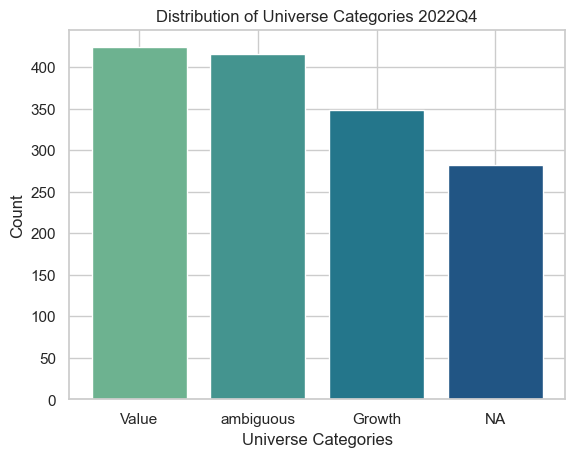

In [109]:
# distribution of labels
universe_counts = current_compo['Universe'].fillna('NA').value_counts(dropna = False)
print(universe_counts)

sns.set(style="whitegrid")
palette = sns.color_palette("crest", len(universe_counts))

plt.bar(universe_counts.index, universe_counts.values, color=palette)

plt.xlabel('Universe Categories')
plt.ylabel('Count')
plt.title('Distribution of Universe Categories 2022Q4')

#plt.show()
#plt.savefig('bar_chart.png')

In [110]:
current_compo_pure = current_compo[current_compo.Universe.isin(['Growth', 'Value'])]

current_compo_pure = current_compo_pure[(current_compo_pure['P/B'] <= current_compo_pure['P/B'].quantile(0.95)) & (current_compo_pure['P/B'] >= current_compo_pure['P/B'].quantile(0.05))]
#current_compo_pure[['P/B', 'Universe']].boxplot(by = 'Universe')

print('Original:', len(current_compo))
print('Without outliers:', len(current_compo_pure))

Original: 1470
Without outliers: 694


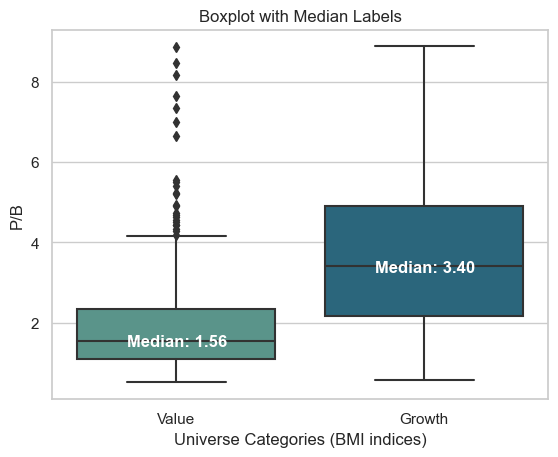

In [111]:
# plotting P/B ratios

#plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=current_compo_pure, y='P/B', x='Universe', palette="crest")

# Label the median of each box
medians = current_compo_pure.groupby('Universe')['P/B'].median()

for i, median in enumerate(medians.index):
    #ax.text(i, medians[median], f'Median: {medians[median]:.2f}',
    #        horizontalalignment='center', verticalalignment='center', color='black', weight='bold')
    x_position = current_compo_pure['Universe'].unique().tolist().index(median)
    ax.text(x_position - 0.2, medians[median] - 0.15, f'Median: {medians[median]:.2f}',
             color='white', weight='bold')

# Adding labels and title
plt.ylabel('P/B')
plt.xlabel('Universe Categories (BMI indices)')
plt.title('Boxplot with Median Labels')

# Display the plot
plt.show()

Without outliers rev: 694


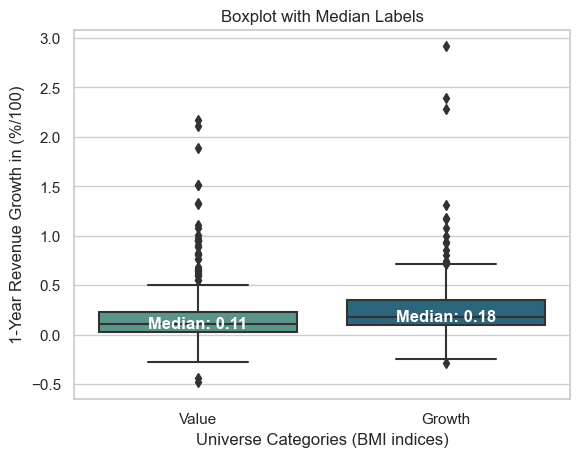

In [112]:
# no further outlier removal

#current_compo_pure = current_compo_pure[(current_compo_pure['Rev_1y_Growth'] <= current_compo_pure['Rev_1y_Growth'].quantile(0.95)) 
#                                        & (current_compo_pure['Rev_1y_Growth'] >= current_compo_pure['Rev_1y_Growth'].quantile(0.05))]
#current_compo_pure[['P/B', 'Universe']].boxplot(by = 'Universe')

print('Without outliers rev:', len(current_compo_pure))

#plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=current_compo_pure, x='Universe', y='Rev_1y_Growth', palette="crest")

# Label the median of each box
medians = current_compo_pure.groupby('Universe')['Rev_1y_Growth'].median()

for i, median in enumerate(medians.index):
    x_position = current_compo_pure['Universe'].unique().tolist().index(median)
    ax.text(x_position, medians[median] + 0.0, f'Median: {medians[median]:.2f}',
            horizontalalignment='center', verticalalignment='center', color='white', weight='bold')
    #ax.text(i, medians[median], f'Median: {medians[median]:.2f}',
    #         color='black', weight='bold')

# Adding labels and title
plt.ylabel('1-Year Revenue Growth in (%/100)')
plt.xlabel('Universe Categories (BMI indices)')
plt.title('Boxplot with Median Labels')

# Display the plot
plt.show()

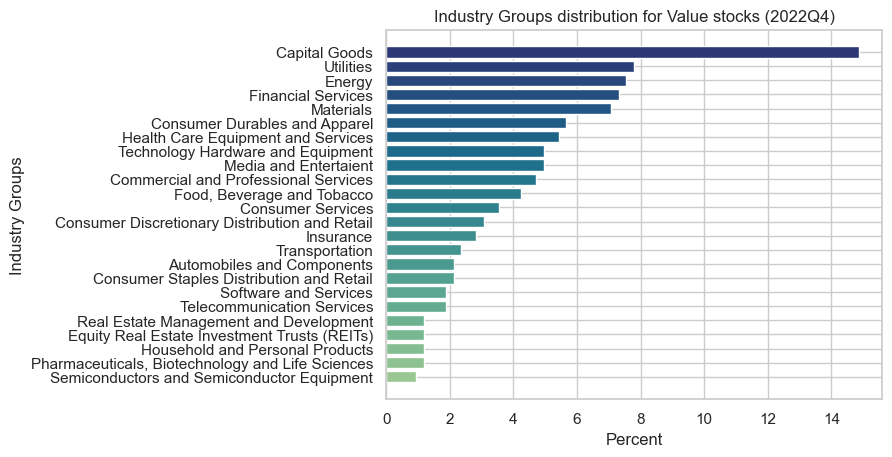

In [152]:
# plotting industry group distribution to see whether industry group has an effect on v/g

current_compo_reset = current_compo[current_compo.Universe.isin(['Growth', 'Value'])]

#growth/value
current_compo_reset = current_compo_reset[current_compo_reset.Universe == 'Value']
industry_counts = current_compo_reset['Industry Group'].value_counts(dropna = False).sort_values()
industry_counts = industry_counts / sum(industry_counts) * 100
sns.set(style="whitegrid")
palette = sns.color_palette("crest", len(industry_counts))

plt.barh(industry_counts.index, industry_counts.values, color=palette)

plt.ylabel('Industry Groups')
plt.xlabel('Percent')
plt.title('Industry Groups distribution for Value stocks (2022Q4)')

#plt.xticks(rotation=90)


plt.show()

In [115]:
# logistic regression model to classify companies not contained in BMI indices

import statsmodels.formula.api as smf

# attempt for log reg including industry group as additional feature

def log_reg_ind(training, predicting):

    df = training

    # Map 'Growth' to 1 and 'Value' to 0
    df['Target'] = df['Universe'].map({'Growth': 1, 'Value': 0})

    # Features (X) and target variable (y)
    dep_vars = ['P/B', 'Rev_1y_Growth']
    df = pd.get_dummies(df, columns=['Industry Group'], drop_first=True)
    ind_index = df.columns.get_loc('Industry Group_Capital Goods')
    dep_vars.extend(df.columns[ind_index:].tolist())
    X = df[dep_vars]
    y = df['Target']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construct and train a logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Display results
    print(f'Accuracy: {accuracy:.2f}')
    print('\nConfusion Matrix:\n', conf_matrix)
    print('\nClassification Report:\n', classification_rep)

    # Get the coefficients of the model
    coefficients = model.coef_[0]
    intercept = model.intercept_[0]

    # Print coefficients and interpret impact
    for i, feature in enumerate(X.columns):
        print(f'{feature}: {coefficients[i]}')

    # Impact comparison
    if abs(coefficients[0]) > abs(coefficients[1]):
        print("\nP/B has a higher impact on the dependent variable.")
    else:
        print("\'growth\' has a higher impact on the dependent variable.")

    df_new = predicting
    dep_vars = ['P/B', 'Rev_1y_Growth']
    df_new = pd.get_dummies(df_new, columns=['Industry Group'], drop_first=True)
    ind_index = df_new.columns.get_loc('Industry Group_Capital Goods')
    dep_vars.extend(df_new.columns[ind_index:].tolist())
    # Features (X) and target variable (y)
    X_new = df_new[dep_vars]
    #y = df_new['Target']

    #scaler = StandardScaler()
    X_new_scaled = scaler.transform(X_new)

    # Make predictions using the trained logistic regression model
    predictions = model.predict(X_new_scaled)

    # Map numerical predictions to category names ('Value' or 'Growth')
    predicted_categories = ['Value' if pred == 0 else 'Growth' for pred in predictions]

    df_new.drop(df_new.columns[ind_index:], axis = 1, inplace = True)
    
    # Add the predicted categories to the new DataFrame
    df_new['Universe'] = predicted_categories

    # Display the new DataFrame with predicted categories
    
    return df_new


def log_reg(training, predicting):

    df = training

    # Map 'Growth' to 1 and 'Value' to 0
    df['Target'] = df['Universe'].map({'Growth': 1, 'Value': 0})

    # Features (X) and target variable (y)
    X = df[['P/B', 'Rev_1y_Growth']]
    y = df['Target']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construct and train a logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Display results
    print(f'Accuracy: {accuracy:.2f}')
    print('\nConfusion Matrix:\n', conf_matrix)
    print('\nClassification Report:\n', classification_rep)

    # Get the coefficients of the model
    coefficients = model.coef_[0]
    intercept = model.intercept_[0]

    # Print coefficients and interpret impact
    for i, feature in enumerate(X.columns):
        print(f'{feature}: {coefficients[i]}')

    # Impact comparison
    if abs(coefficients[0]) > abs(coefficients[1]):
        print("\nP/B has a higher impact on the dependent variable.")
    else:
        print("\'growth\' has a higher impact on the dependent variable.")

    df_new = predicting
    # Features (X) and target variable (y)
    X_new = df_new[['P/B', 'Rev_1y_Growth']]
    #y = df_new['Target']

    #scaler = StandardScaler()
    X_new_scaled = scaler.transform(X_new)

    # Make predictions using the trained logistic regression model
    predictions = model.predict(X_new_scaled)

    # Map numerical predictions to category names ('Value' or 'Growth')
    predicted_categories = ['Value' if pred == 0 else 'Growth' for pred in predictions]

    # Add the predicted categories to the new DataFrame
    df_new['Universe'] = predicted_categories

    # Display the new DataFrame with predicted categories
    return df_new

In [116]:
current_compo_unclassified = current_compo[~(current_compo.Universe.isin(['Growth', 'Value']))]
current_compo_unclassified.drop(['Universe_Value', 'Universe_Growth', 'Universe'], axis = 1, inplace = True)
current_compo_unclassified.dropna(inplace = True)

current_compo_classified = log_reg_ind(current_compo_pure, current_compo_unclassified)
#current_compo_classified = log_reg_s(current_compo_pure, current_compo_unclassified)
current_compo_classified.head()

Accuracy: 0.78

Confusion Matrix:
 [[67 17]
 [14 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        84
           1       0.71      0.75      0.73        55

    accuracy                           0.78       139
   macro avg       0.77      0.77      0.77       139
weighted avg       0.78      0.78      0.78       139

P/B: 1.296604170137391
Rev_1y_Growth: 0.5446329240884425
Industry Group_Capital Goods: -0.09026989368638155
Industry Group_Commercial and Professional Services: 0.17454430236402182
Industry Group_Consumer Discretionary Distribution and Retail: -0.14058296596009737
Industry Group_Consumer Durables and Apparel: 0.06630674055594644
Industry Group_Consumer Services: 0.009189425385852925
Industry Group_Consumer Staples Distribution and Retail: -0.11113267738117717
Industry Group_Energy: -0.3736622801420507
Industry Group_Equity Real Estate Investment Trusts (REITs): -0.010240608198530525
Indu

C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\116142217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_compo_unclassified.drop(['Universe_Value', 'Universe_Growth', 'Universe'], axis = 1, inplace = True)
C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\116142217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_compo_unclassified.dropna(inplace = True)


,GV_Key,Date_cal,Ticker Symbol,Company Name,Quarter,Fiscal Data Year and Quarter,Final Date,Date_rep,Assets,Cash,...,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E,is_outlier,Universe
47,GV_001078,2022-12-31,ABT,ABBOTT LABORATORIES,2022Q4,2022Q4,2023-02-20,2023-01-25,74438.000,9882.000,...,0.504218,0.132755,0.027991,5.244186,18.884678,72.074616,119.103303,184.477526,0,Growth
71,GV_001104,2022-12-31,ACU,ACME UNITED CORP,2022Q4,2022Q4,2023-04-03,2023-03-02,164.377,6.100,...,0.519215,0.037110,-0.007554,1.118161,1.972348,69.702282,-3345.709517,-145.709292,0,Value
191,GV_001393,2022-12-31,UHAL,U-HAUL HOLDING CO,2022Q4,2022Q3,2023-02-09,2023-02-08,18116.328,2510.619,...,0.645989,0.138583,0.031067,1.901321,9.801505,30.980223,53.758883,67.657558,0,Growth
215,GV_001414,2022-12-31,PRI,PRIMERICA INC,2022Q4,2022Q4,2023-03-13,2023-02-23,15348.877,489.240,...,0.887842,0.031875,0.083622,3.557736,8.892415,30.796498,32.182599,42.433431,0,Value
263,GV_001559,2022-12-31,AMS,AMERICAN SHARED HSPTL SERV,2022Q4,2022Q4,2023-04-24,2023-03-24,43.956,12.335,...,0.417031,0.280622,0.009600,0.689136,3.575962,8.735267,21.190729,73.220000,0,Value


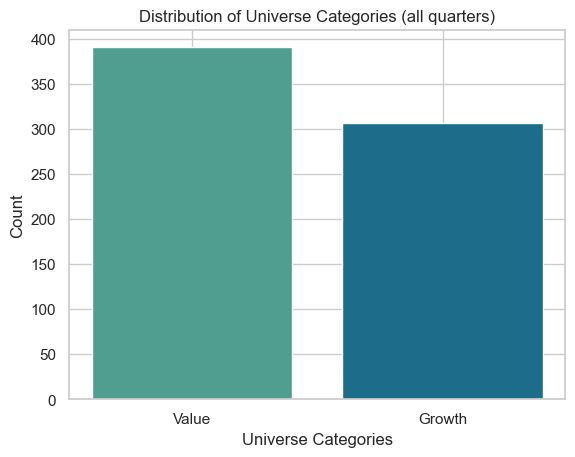

In [117]:
universe_counts = current_compo_classified['Universe'].value_counts(dropna = False)
sns.set(style="whitegrid")
palette = sns.color_palette("crest", len(universe_counts))

plt.bar(universe_counts.index, universe_counts.values, color=palette)

plt.xlabel('Universe Categories')
plt.ylabel('Count')
plt.title('Distribution of Universe Categories (all quarters)')

plt.show()

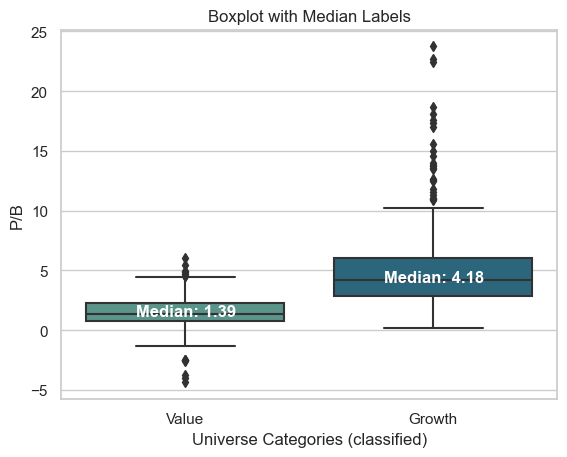

In [118]:
# plotting variable distributions of newly classified dataset


current_compo_classified = current_compo_classified[(current_compo_classified['P/B'] <= current_compo_classified['P/B'].quantile(0.99)) 
                                        & (current_compo_classified['P/B'] >= current_compo_classified['P/B'].quantile(0.01))]

ax = sns.boxplot(data=current_compo_classified, y='P/B', x='Universe', palette="crest", order = ['Value', 'Growth'])

# Label the median of each box
medians = current_compo_classified.groupby('Universe')['P/B'].median()
medians = medians.sort_values()

for i, median in enumerate(medians.index):
    #ax.text(i, medians[median], f'Median: {medians[median]:.2f}',
    #        horizontalalignment='center', verticalalignment='center', color='black', weight='bold')
    x_position = current_compo_classified.sort_values(by = 'Universe', ascending = False)['Universe'].unique().tolist().index(median)
    ax.text(x_position - 0.2, medians[median] -0.2, f'Median: {medians[median]:.2f}',
             color='white', weight='bold')

# Adding labels and title
plt.ylabel('P/B')
plt.xlabel('Universe Categories (classified)')
plt.title('Boxplot with Median Labels')

# Display the plot
plt.show()

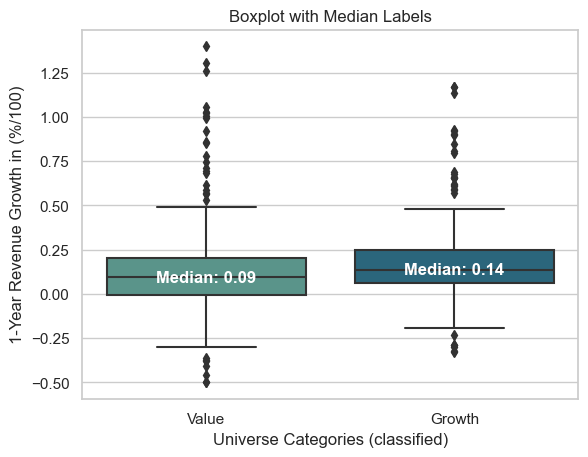

In [119]:
current_compo_classified = current_compo_classified[(current_compo_classified['Rev_1y_Growth'] <= current_compo_classified['Rev_1y_Growth'].quantile(0.99)) 
                                        & (current_compo_classified['Rev_1y_Growth'] >= current_compo_classified['Rev_1y_Growth'].quantile(0.01))]

#plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=current_compo_classified, x='Universe', y='Rev_1y_Growth', palette="crest", order = ['Value', 'Growth'])

# Label the median of each box
medians = current_compo_classified.groupby('Universe')['Rev_1y_Growth'].median()

for i, median in enumerate(medians.index):
    x_position = current_compo_classified.sort_values(by = 'Universe', ascending = False)['Universe'].unique().tolist().index(median)
    ax.text(x_position, medians[median] , f'Median: {medians[median]:.2f}',
            horizontalalignment='center', verticalalignment='center', color='white', weight='bold')
    #ax.text(i, medians[median], f'Median: {medians[median]:.2f}',
    #         color='black', weight='bold')

# Adding labels and title
plt.ylabel('1-Year Revenue Growth in (%/100)')
plt.xlabel('Universe Categories (classified)')
plt.title('Boxplot with Median Labels')

# Display the plot
plt.show()

In [38]:
def append_df(data1,data2):
    combined_df = pd.concat([data1, data2], ignore_index=True)
    return combined_df

In [39]:
# doing the same thing with the whole data set
raw_data_pure = raw_data[raw_data.Universe.isin(['Growth', 'Value'])]
raw_data_pure.drop(['Universe_Value', 'Universe_Growth'], axis = 1, inplace = True)
raw_data_pure.dropna(inplace = True) #only 7 NAs
#raw_data_pure.info()

C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\3681712595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_pure.drop(['Universe_Value', 'Universe_Growth'], axis = 1, inplace = True)
C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\3681712595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_pure.dropna(inplace = True) #only 7 NAs


In [40]:
raw_data_pure.Universe.unique()

array(['Value', 'Growth'], dtype=object)

In [41]:
raw_data_unclassified = raw_data[~(raw_data.Universe.isin(['Growth', 'Value']))]
raw_data_unclassified.drop(['Universe_Value', 'Universe_Growth', 'Universe'], axis = 1, inplace = True)
raw_data_unclassified.dropna(inplace = True) #only 7 NAs

C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\1520314969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_unclassified.drop(['Universe_Value', 'Universe_Growth', 'Universe'], axis = 1, inplace = True)
C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\1520314969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_unclassified.dropna(inplace = True) #only 7 NAs


In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29411 entries, 0 to 29410
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   GV_Key                        29411 non-null  object        
 1   Date_cal                      29411 non-null  datetime64[ns]
 2   Ticker Symbol                 29411 non-null  object        
 3   Company Name                  29411 non-null  object        
 4   Quarter                       29411 non-null  object        
 5   Fiscal Data Year and Quarter  29409 non-null  object        
 6   Final Date                    29409 non-null  datetime64[ns]
 7   Date_rep                      29411 non-null  datetime64[ns]
 8   Assets                        29411 non-null  float64       
 9   Cash                          29411 non-null  float64       
 10  Long-Term Debt                29411 non-null  float64       
 11  Invested Capital            

In [43]:
raw_data_unclassified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13672 entries, 24 to 29410
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   GV_Key                        13672 non-null  object        
 1   Date_cal                      13672 non-null  datetime64[ns]
 2   Ticker Symbol                 13672 non-null  object        
 3   Company Name                  13672 non-null  object        
 4   Quarter                       13672 non-null  object        
 5   Fiscal Data Year and Quarter  13672 non-null  object        
 6   Final Date                    13672 non-null  datetime64[ns]
 7   Date_rep                      13672 non-null  datetime64[ns]
 8   Assets                        13672 non-null  float64       
 9   Cash                          13672 non-null  float64       
 10  Long-Term Debt                13672 non-null  float64       
 11  Invested Capital           

In [98]:
dep_vars = ['P/B', 'Rev_1y_Growth']
df = pd.get_dummies(raw_data_pure, columns=['Industry Group'], drop_first=True)
#df.to_clipboard()
ind_index = df.columns.get_loc('Industry Group_Capital Goods')
#print(df.columns[ind_index:])
dep_vars.extend(df.columns[ind_index:].tolist())


['P/B', 'Rev_1y_Growth', 'Industry Group_Capital Goods', 'Industry Group_Commercial and Professional Services', 'Industry Group_Consumer Discretionary Distribution and Retail', 'Industry Group_Consumer Durables and Apparel', 'Industry Group_Consumer Services', 'Industry Group_Consumer Staples Distribution and Retail', 'Industry Group_Energy', 'Industry Group_Equity Real Estate Investment Trusts (REITs)', 'Industry Group_Financial Services', 'Industry Group_Food, Beverage and Tobacco', 'Industry Group_Health Care Equipment and Services', 'Industry Group_Household and Personal Products', 'Industry Group_Insurance', 'Industry Group_Materials', 'Industry Group_Media and Entertaient', 'Industry Group_Pharmaceuticals, Biotechnology and Life Sciences', 'Industry Group_Real Estate Management and Development', 'Industry Group_Semiconductors and Semiconductor Equipment', 'Industry Group_Software and Services', 'Industry Group_Technology Hardware and Equipment', 'Industry Group_Telecommunication 

In [104]:
raw_data_classified = log_reg_ind(raw_data_pure, raw_data_unclassified)
raw_data_classified.head()

Accuracy: 0.78

Confusion Matrix:
 [[1678  186]
 [ 498  785]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83      1864
           1       0.81      0.61      0.70      1283

    accuracy                           0.78      3147
   macro avg       0.79      0.76      0.76      3147
weighted avg       0.79      0.78      0.78      3147

P/B: 1.323389527301775
Rev_1y_Growth: 0.3951966762386986
Industry Group_Capital Goods: 0.12291399002633979
Industry Group_Commercial and Professional Services: 0.25289859558057937
Industry Group_Consumer Discretionary Distribution and Retail: 0.09472985213598857
Industry Group_Consumer Durables and Apparel: 0.08669523272491614
Industry Group_Consumer Services: 0.1622977987848735
Industry Group_Consumer Staples Distribution and Retail: -0.3086827575844316
Industry Group_Energy: -0.2769465272986279
Industry Group_Equity Real Estate Investment Trusts (REITs): -0.022867335819413404
I

C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\1685273086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Universe'].map({'Growth': 1, 'Value': 0})


,GV_Key,Date_cal,Ticker Symbol,Company Name,Quarter,Fiscal Data Year and Quarter,Final Date,Date_rep,Assets,Cash,...,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E,is_outlier,Universe
24,GV_001078,2017-03-31,ABT,ABBOTT LABORATORIES,2017Q1,2017Q1,2017-05-04,2017-04-19,70887.0,8706.0,...,0.554968,0.122815,0.013282,2.387660,10.621612,48.028486,107.317240,160.591669,0,Value
25,GV_001078,2017-06-30,ABT,ABBOTT LABORATORIES,2017Q2,2017Q2,2017-08-04,2017-07-20,71151.0,9675.0,...,0.553232,0.135978,0.008903,2.775842,11.982966,47.059732,76.325285,281.028080,0,Value
26,GV_001078,2017-09-30,ABT,ABBOTT LABORATORIES,2017Q3,2017Q3,2017-11-06,2017-10-18,72248.0,11012.0,...,0.554064,0.152419,0.018716,3.007549,12.859195,49.334520,85.757271,145.630921,0,Growth
27,GV_001078,2017-12-31,ABT,ABBOTT LABORATORIES,2017Q4,2017Q4,2018-02-16,2018-01-24,76250.0,9407.0,...,0.592157,0.123370,-0.026626,3.454559,12.883738,49.281598,85.692104,-118.085375,0,Growth
28,GV_001078,2018-03-31,ABT,ABBOTT LABORATORIES,2018Q1,2018Q1,2018-05-06,2018-04-18,70908.0,3857.0,...,0.554338,0.054394,0.013227,3.289193,12.874910,58.335738,122.138111,227.621024,0,Growth


In [45]:
# merging the datasets

# current compo
current_compo_final = append_df(current_compo_pure ,current_compo_classified)

# raw_data
raw_data_final = append_df(raw_data_pure, raw_data_classified)
raw_data_final.head()

,GV_Key,Date_cal,Ticker Symbol,Company Name,Quarter,Fiscal Data Year and Quarter,Final Date,Date_rep,Assets,Cash,...,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E,is_outlier,Universe,Target
0,GV_001076,2017-03-31,PRG,PROG HOLDINGS INC,2017Q1,2017Q1,2017-05-16,2017-04-28,2624.484,348.490,...,0.132784,0.035529,1.706586,2.541843,4.578281,24.888109,40.276245,0,Value,0.0
1,GV_001076,2017-06-30,PRG,PROG HOLDINGS INC,2017Q2,2017Q2,2017-08-13,2017-07-28,2548.130,260.335,...,0.102167,0.023562,2.178355,3.453030,6.415589,38.090930,77.513235,0,Value,0.0
2,GV_001076,2017-09-30,PRG,PROG HOLDINGS INC,2017Q3,2017Q3,2017-10-30,2017-10-27,2595.004,126.253,...,0.048652,0.016100,1.759674,2.768258,5.368843,50.491260,91.639814,0,Value,0.0
3,GV_001076,2017-12-31,PRG,PROG HOLDINGS INC,2017Q4,2017Q4,2018-03-14,2018-02-15,2692.264,51.037,...,0.018957,0.102754,1.793223,2.933589,5.565334,37.422952,14.615522,0,Value,0.0
4,GV_001076,2018-03-31,PRG,PROG HOLDINGS INC,2018Q1,2018Q1,2018-05-16,2018-04-26,2719.009,189.410,...,0.069661,0.029750,1.695942,2.610930,4.677097,35.167794,47.715412,0,Value,0.0


In [46]:
raw_data_final.drop(['is_outlier', 'Target'], axis = 1, inplace = True)

In [47]:
raw_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   GV_Key                        29404 non-null  object        
 1   Date_cal                      29404 non-null  datetime64[ns]
 2   Ticker Symbol                 29404 non-null  object        
 3   Company Name                  29404 non-null  object        
 4   Quarter                       29404 non-null  object        
 5   Fiscal Data Year and Quarter  29404 non-null  object        
 6   Final Date                    29404 non-null  datetime64[ns]
 7   Date_rep                      29404 non-null  datetime64[ns]
 8   Assets                        29404 non-null  float64       
 9   Cash                          29404 non-null  float64       
 10  Long-Term Debt                29404 non-null  float64       
 11  Invested Capital            

In [48]:
both = raw_data_final.groupby('Company Name')['Universe'].apply(set)
print(both[both.apply(lambda x: len(x) > 1)]) # for 347 companies, their classification changes over the time

Company Name
22ND CENTURY GROUP INC      {Value, Growth}
23ANDME HOLDING CO          {Value, Growth}
ABBOTT LABORATORIES         {Value, Growth}
ACADIA HEALTHCARE CO INC    {Value, Growth}
ACTIVISION BLIZZARD INC     {Value, Growth}
                                 ...       
XPO INC                     {Value, Growth}
YANDEX N V                  {Value, Growth}
YUM CHINA HOLDINGS INC      {Value, Growth}
ZIFF DAVIS INC              {Value, Growth}
ZTO EXPRESS CAYMAN INC      {Value, Growth}
Name: Universe, Length: 347, dtype: object


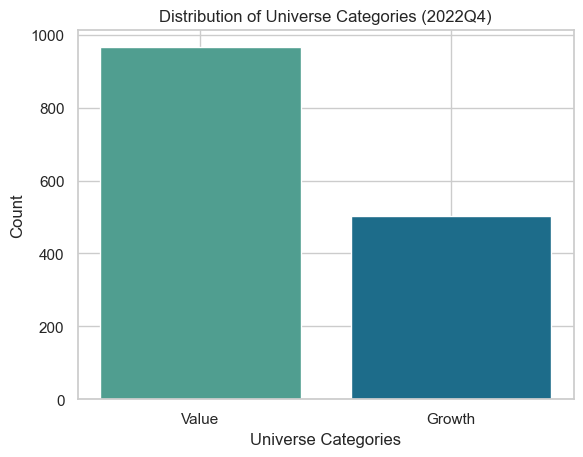

In [141]:
current_compo_final = raw_data_final[raw_data_final.Quarter == '2022Q4']
universe_counts = current_compo_final['Universe'].value_counts(dropna = False)
sns.set(style="whitegrid")
palette = sns.color_palette("crest", len(universe_counts))

plt.bar(universe_counts.index, universe_counts.values, color=palette)

plt.xlabel('Universe Categories')
plt.ylabel('Count')
plt.title('Distribution of Universe Categories (2022Q4)')

plt.show()
#plt.savefig('bar_chart.png')

59


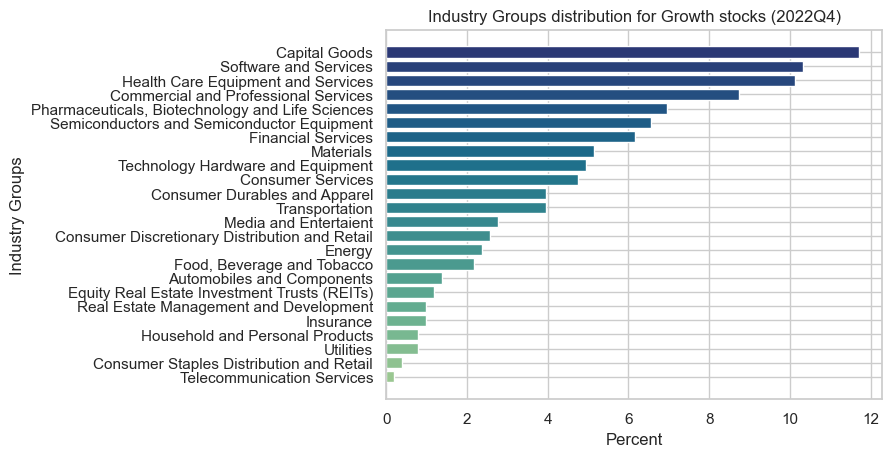

In [148]:
# plotting industry group distribution to see whether industry group has an effect on v/g

#current_compo_final = current_compo_final[current_compo_final.Universe.isin(['Growth', 'Value'])]

#growth/value
current_compo_final = current_compo_final[current_compo_final.Universe == 'Growth']
industry_counts = current_compo_final['Industry Group'].value_counts(dropna = False).sort_values()
industry_counts = industry_counts / sum(industry_counts) * 100
sns.set(style="whitegrid")
palette = sns.color_palette("crest", len(industry_counts))

plt.barh(industry_counts.index, industry_counts.values, color=palette)

plt.ylabel('Industry Groups')
plt.xlabel('Percent')
plt.title('Industry Groups distribution for Growth stocks (2022Q4)')

#plt.xticks(rotation=90)
print(len(current_compo_final[current_compo_final["Industry Group"] == "Capital Goods"]))

plt.show()

In [58]:
raw_data_final.to_excel('clustering_data.xlsx')

In [59]:
raw_data_final.to_csv('clustering_data.csv')

In [60]:
raw_data_final.columns

Index(['GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name', 'Quarter',
       'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep', 'Assets',
       'Cash', 'Long-Term Debt', 'Invested Capital', 'Liabilities',
       'Net Income', 'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ',
       'Share_Price', 'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield',
       'Market_Cap', 'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth',
       'Rev_2y_Growth', 'Primary Industry', 'Industry Sector',
       'Industry Group', 'Industry', 'Shares_out', 'EBIT_Margin',
       'EBITDA_Margin', 'Profit_Margin', 'Leverage', 'Debt/Assets',
       'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA', 'P/EBIT', 'P/E',
       'Universe'],
      dtype='object')

In [61]:
# saving separate universes
"""
data_value = raw_data_final[raw_data_final.Universe == 'Value']
data_value.drop('Universe', axis = 1, inplace = True)

data_growth = raw_data_final[raw_data_final.Universe == 'Growth']
data_growth.drop('Universe', axis = 1, inplace = True)

data_value.to_csv('clustering_data_value.csv')
data_growth.to_csv('clustering_data_growth.csv')
"""

C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\4149822014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_value.drop('Universe', axis = 1, inplace = True)
C:\Users\Dani\AppData\Local\Temp\ipykernel_53692\4149822014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_growth.drop('Universe', axis = 1, inplace = True)


### Archive

<AxesSubplot:title={'center':'Rev_2y_Growth'}, xlabel='[Universe]'>

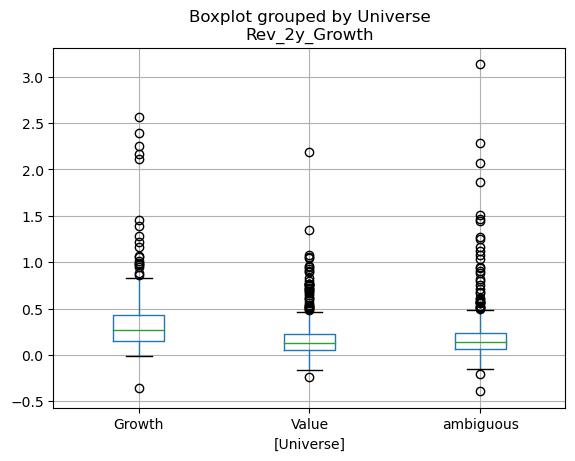

In [ ]:
#not really useful
current_compo_no_outliers = current_compo[(current_compo['Rev_1y_Growth'] <= current_compo['Rev_1y_Growth'].quantile(0.99)) &
                                          (current_compo['Rev_1y_Growth'] >= current_compo['Rev_1y_Growth'].quantile(0.01))]
current_compo_no_outliers[['Rev_2y_Growth', 'Universe']].boxplot(by = 'Universe')

In [ ]:
len(current_compo_no_outliers)

1327

In [ ]:
np.quantile(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'Growth']['P/B'],0.25)

2.115362604245427

In [ ]:
#all companies with a P/B that is higher than the 75% quantile of the value stocks should be a growth stock
pb_above_value_threshold = np.quantile(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'Value']['P/B'],0.75)
growth_above_value_threshold = np.quantile(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'Value']['Rev_2y_Growth'],0.75)
print(pb_above_value_threshold)
print(growth_above_value_threshold)

2.2810492706142664
0.2262385


In [ ]:
print('total:',len(current_compo_no_outliers))
print('growth:',len(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'Growth']))
print('value:',len(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'Value']))
print('ambiguous:',len(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'ambiguous']))

total: 1327
growth: 384
value: 447
ambiguous: 496


In [ ]:
len(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'ambiguous'][current_compo_no_outliers['P/B'] > above_value_threshold])

C:\Users\Dani\AppData\Local\Temp\ipykernel_30976\2356845933.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(current_compo_no_outliers[current_compo_no_outliers['Universe'] == 'ambiguous'][current_compo_no_outliers['P/B'] > above_value_threshold])


304

In [ ]:
print('total:',len(raw_data))
print('growth:',len(raw_data[raw_data['Universe'] == 'Growth']))
print('value:',len(raw_data[raw_data['Universe'] == 'Value']))
print('ambiguous:',len(raw_data[raw_data['Universe'] == 'ambiguous']))

total: 33830
growth: 7016
value: 9897
ambiguous: 9975


In [ ]:
#finally categorizing to either value or growth
raw_data['Universe_Type'] = np.where((raw_data['Universe'] == 'ambiguous') 
                                     & (raw_data['P/B'] > pb_above_value_threshold) 
                                     & (raw_data['Rev_2y_Growth'] > growth_above_value_threshold),'Growth','Value')

In [ ]:
print('total:',len(raw_data))
print('growth:',len(raw_data[raw_data['Universe_Type'] == 'Growth']))
print('value:',len(raw_data[raw_data['Universe_Type'] == 'Value']))
print('ambiguous:',len(raw_data[raw_data['Universe_Type'] == 'ambiguous']))

total: 33830
growth: 1015
value: 32815
ambiguous: 0


In [ ]:
current_compo = raw_data[raw_data.Quarter == '2022Q4']

In [ ]:
print('total:',len(current_compo))
print('growth:',len(current_compo[current_compo['Universe_Type'] == 'Growth']))
print('value:',len(current_compo[current_compo['Universe_Type'] == 'Value']))
print('ambiguous:',len(current_compo[current_compo['Universe_Type'] == 'ambiguous'])) 

total: 1778
growth: 310
value: 1468
ambiguous: 0


<AxesSubplot:title={'center':'P/B'}, xlabel='[Universe]'>

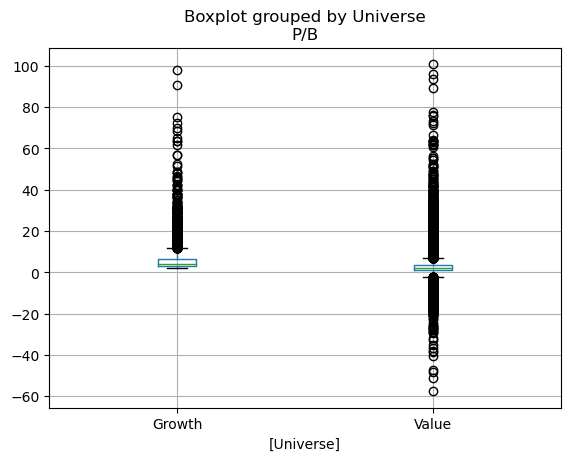

In [ ]:
raw_data[['P/B', 'Universe']].boxplot(by = 'Universe')

<AxesSubplot:title={'center':'P/B'}, xlabel='[Universe]'>

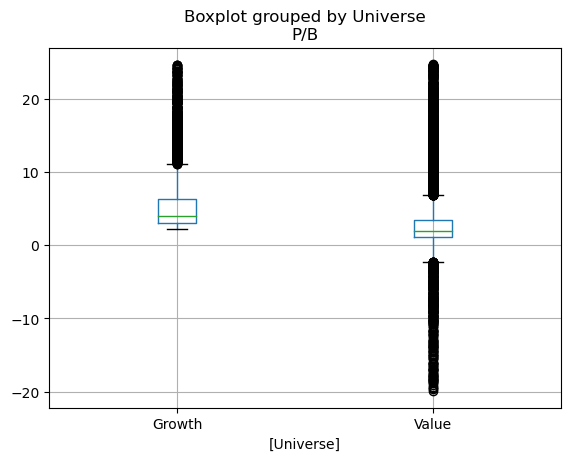

In [ ]:
data_no_outliers[['P/B', 'Universe']].boxplot(by = 'Universe')

<AxesSubplot:title={'center':'Rev_1y_Growth'}, xlabel='[Universe]'>

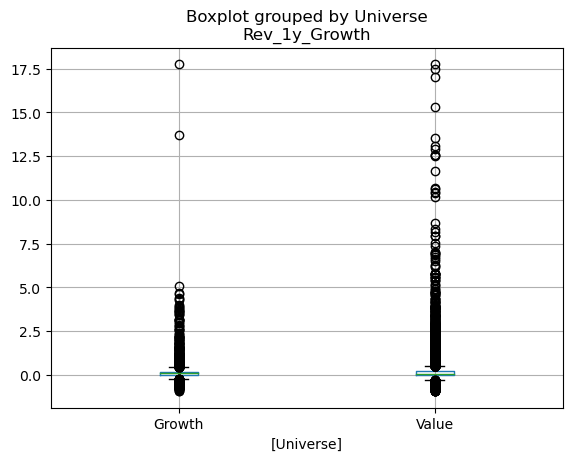

In [ ]:
data_no_outliers[['Rev_1y_Growth', 'Universe']].boxplot(by = 'Universe')